In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk
from nltk.corpus import wordnet
from collections import Counter


#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


# Prétraitement
-
-
-
-

In [24]:
df = pd.read_csv("scitweets_export.tsv", sep = "\t")

In [25]:
text = []
all_text = list(df["text"])
for t in all_text:
    a = re.sub("[\.,/\\@:;\"\'0-9“”’\[\]]", " \1 ", t)
    a = re.sub("http\S*", "", a) #Enlever les liens
    a = re.sub("#\S*", "", a) #Enlever les tags
    a = a.lower()
    text.append(a)

text_sep = [word_tokenize(t) for t in text]

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_80973/2491241935.py:4: SyntaxWarning: invalid escape sequence '\.'
  a = re.sub("[\.,/\\@:;\"\'0-9“”’\[\]]", " \1 ", t)
/tmp/ipykernel_80973/2491241935.py:5: SyntaxWarning: invalid escape sequence '\S'
  a = re.sub("http\S*", "", a) #Enlever les liens
/tmp/ipykernel_80973/2491241935.py:6: SyntaxWarning: invalid escape sequence '\S'
  a = re.sub("#\S*", "", a) #Enlever les tags


In [26]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):  # Adjectif
        return wordnet.ADJ
    elif tag.startswith('V'):  # Verbe
        return wordnet.VERB
    elif tag.startswith('N'):  # Nom
        return wordnet.NOUN
    elif tag.startswith('R'):  # Adverbe
        return wordnet.ADV
    else:
        return wordnet.NOUN 

    
lemmatizer = WordNetLemmatizer()
refined_tweets = []
for tweet in text_sep:
    pos_tags = pos_tag(tweet)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    refined_tweets.append(lemmatized_words)


In [27]:
type("a")

str

In [28]:
mots_a_supprimer = ["the", "to", "a", "of", "and", "in", "for", "on", "this", 
                    "with", "that", "have", "by", "it", "from", "be", "do", 
                    "t", " ", "to", "\x01", "co", "no", "out", "d", "our", "so",
                   "(", ")", "your", "but", "if", "than", "\x01"]

# Supprimer toutes les occurrences de "the"
filtered_words = [[word for word in row if word not in mots_a_supprimer] for row in refined_tweets]
#filtered_words = re.sub(r"[\x00-\x1F]", "", filtered_words)

In [29]:
def plot_word_distribution(word_list):
    word_list_flat = [word for sublist in word_list for word in sublist]
    word_counts = Counter(word_list_flat)
    # 3. Afficher les 10 mots les plus fréquents (optionnel)
    most_common = word_counts.most_common(100)
    #print(most_common[0:10])
    words, counts = zip(*most_common)
    
    # 4. Tracer avec seaborn
    #plt.figure(figsize=(30, 12))
    plt.figure(figsize=(16, 8)).gca()
    sns.barplot(x=list(words), y=list(counts))
    plt.title("Distribution des mots", fontsize = 25)
    plt.ylabel("Nombre d'occurrences", fontsize = 20)
    plt.xlabel("Mots", fontsize = 20)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


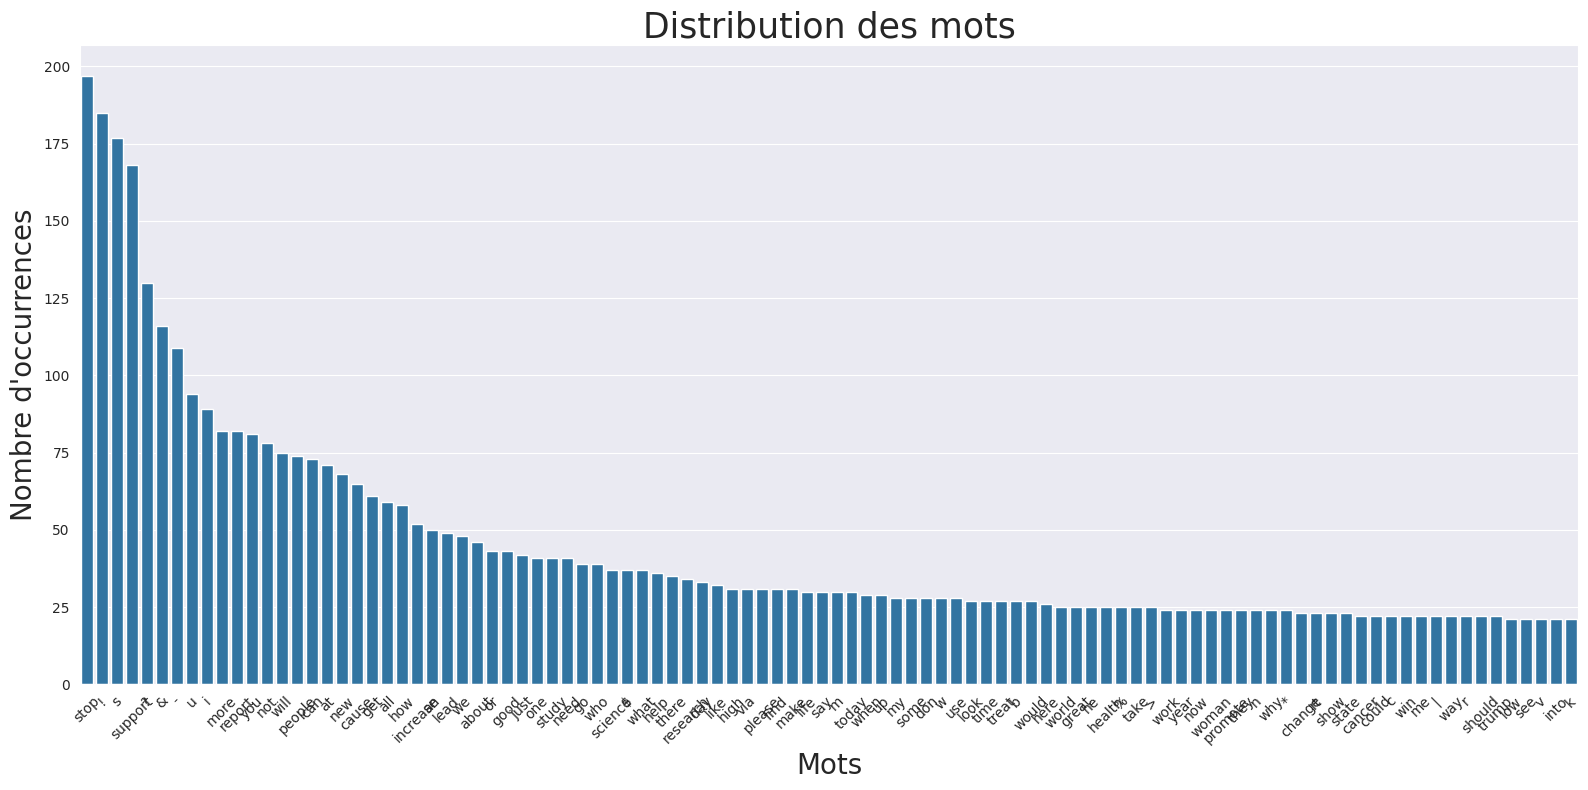

In [30]:
plot_word_distribution(filtered_words)

In [31]:
def remake_sentences(sentence_list):
    sentence_join = []
    phrase = ""
    for sentence in sentence_list:
        for word in sentence:
            phrase = phrase + word + " "
        sentence_join.append(phrase)
        phrase = ""
    return(sentence_join)


In [32]:
X = remake_sentences(filtered_words)  # Utiliser uniquement la colonne 'text' comme feature
y_binary = df['science_related']  # Étiquette binaire (scientifique ou non)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_vec = vectorizer.fit_transform(X)  # Apprentissage et transformation sur l'entraînement

X_train_vec = vectorizer.fit_transform(X_train)  # Apprentissage et transformation sur l'entraînement


X_test_vec = vectorizer.transform(X_test)

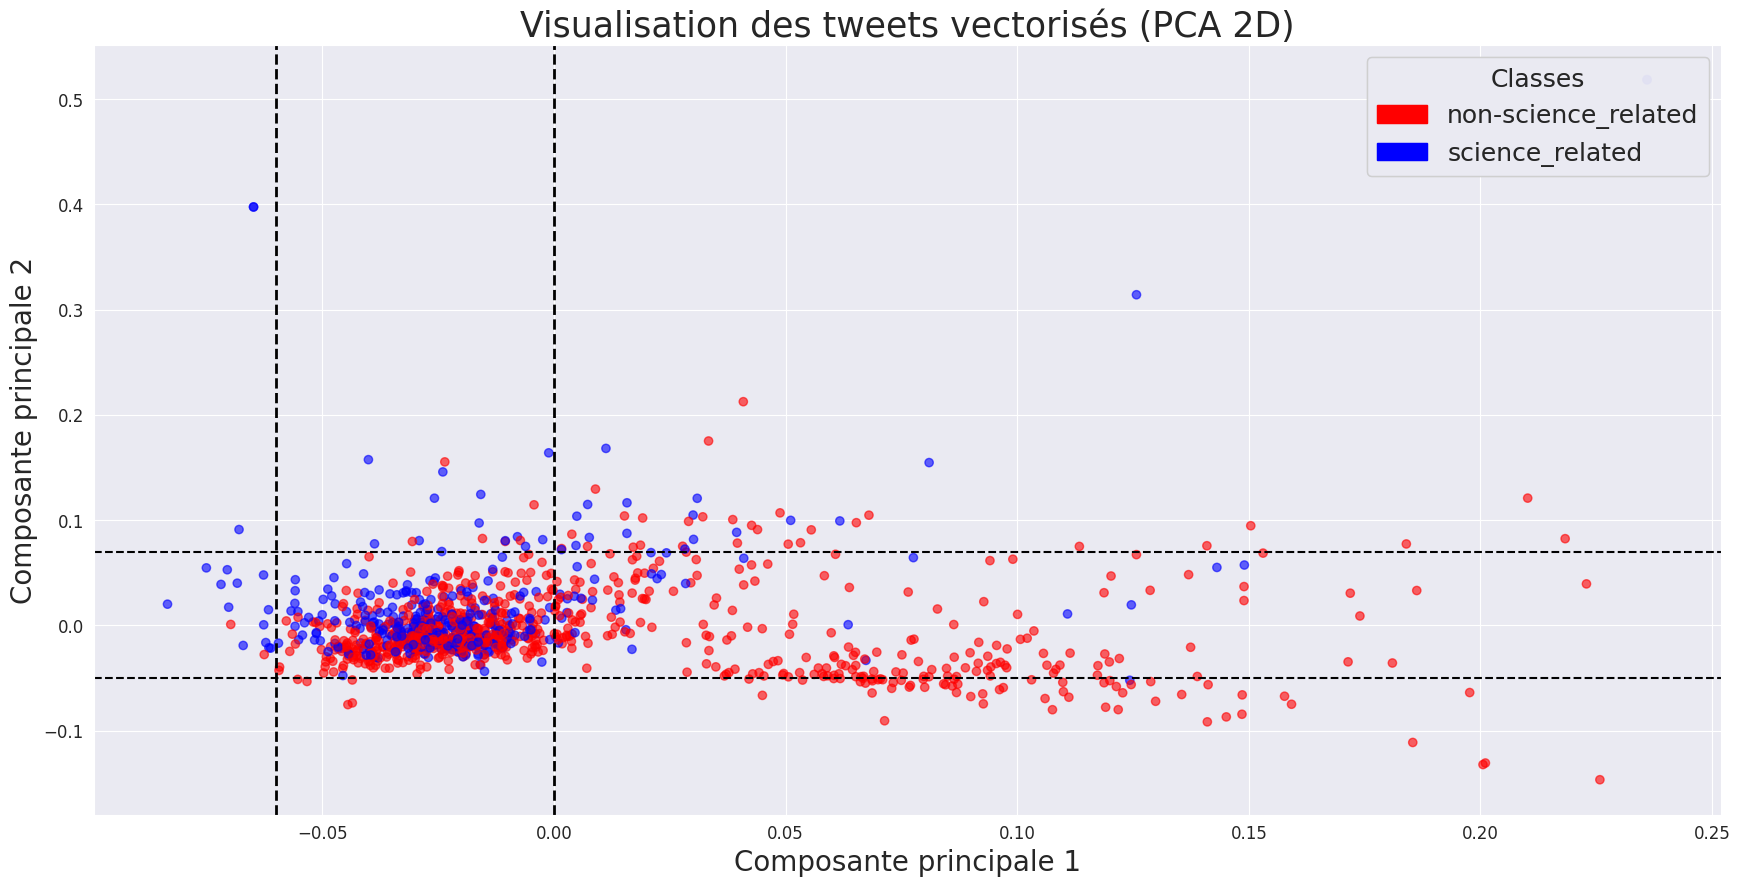

In [33]:
import matplotlib.patches as mpatches

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())

# Préparation de la figure
plt.figure(figsize=(21, 10))

# SCATTERPLOT avec couleur en fonction des classes (y_binary)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap=ListedColormap(['red', 'blue']), alpha=0.6)

# LÉGENDE 1 : pour y_binary
# Créer des étiquettes de couleur
class_labels = {0: 'non-science_related', 1: 'science_related'}
unique_classes = np.unique(y_binary)

handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cls)), label=class_labels[cls])
    for cls in unique_classes
]

legend1 = plt.legend(handles=handles, title='Classes', loc='upper right', prop={'size': 18}, title_fontsize=18)
plt.gca().add_artist(legend1)

# Ajouter les lignes rouges (zones de découpe)
v1 = plt.axvline(x=-0.06, color='black', linestyle='--', linewidth=2)
v2 = plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
h1 = plt.axhline(y=0.07, color='black', linestyle='--')
h2 = plt.axhline(y=-0.05, color='black', linestyle='--')



# TITRES ET LABELS
plt.title('Visualisation des tweets vectorisés (PCA 2D)', fontsize = 25)
plt.xlabel('Composante principale 1', fontsize = 20)
plt.ylabel('Composante principale 2', fontsize = 20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [34]:
%reset -f
%clear

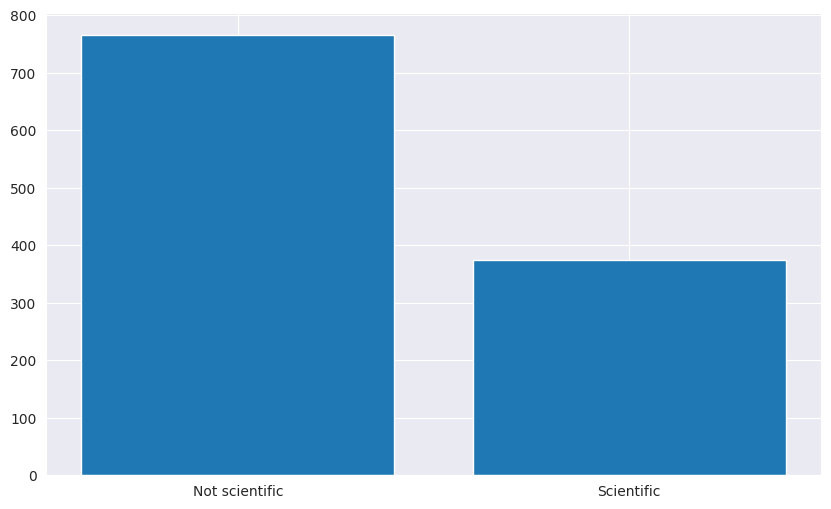

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk


dataset = pd.read_csv('scitweets_export.tsv', sep='\t')


not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

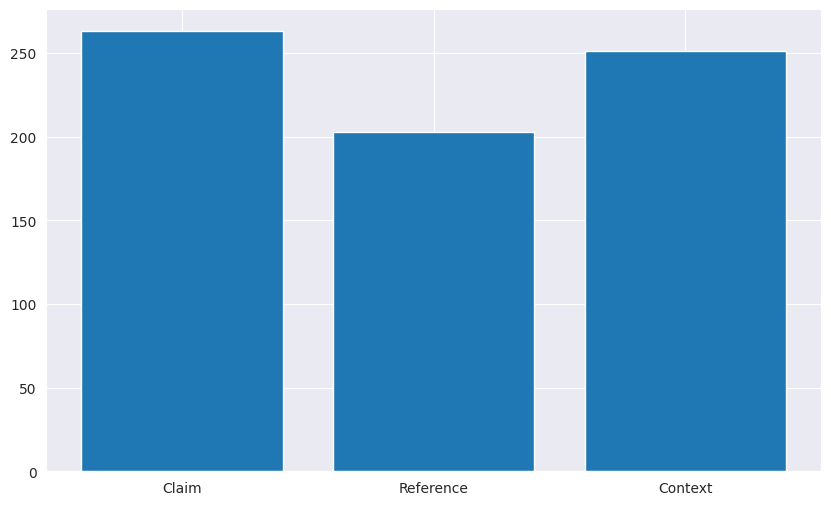

In [36]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Modélisation

## - Première classification

### Les modèles construit avec le texte pretraité

In [37]:
%reset -f
%clear


OPTIMISATION ET ÉVALUATION DE LOGISTIC REGRESSION

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Meilleurs paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       147
           1       0.96      0.90      0.93       159

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306

Test Accuracy: 0.9281
[[141   6]
 [ 16 143]]


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


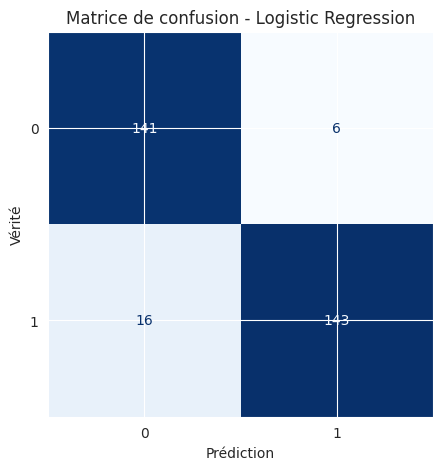


Cross-Validation Results (k=10):
Accuracy scores: [0.92810458 0.93464052 0.94771242 0.91503268 0.88235294 0.94771242
 0.92810458 0.94117647 0.94771242 0.95424837]
Mean accuracy: 0.9327 (±0.0203)

OPTIMISATION ET ÉVALUATION DE NAIVE BAYES

Recherche des meilleurs hyperparamètres pour Naive Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres: {'alpha': 0.1, 'fit_prior': True}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       147
           1       0.88      0.95      0.91       159

    accuracy                           0.91       306
   macro avg       0.91      0.90      0.90       306
weighted avg       0.91      0.91      0.90       306

Test Accuracy: 0.9052
[[126  21]
 [  8 151]]


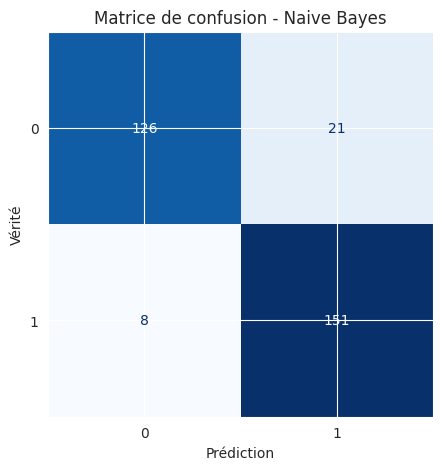


Cross-Validation Results (k=10):
Accuracy scores: [0.92156863 0.94117647 0.91503268 0.87581699 0.8627451  0.91503268
 0.90849673 0.91503268 0.92156863 0.91503268]
Mean accuracy: 0.9092 (±0.0218)

OPTIMISATION ET ÉVALUATION DE K-NN

Recherche des meilleurs hyperparamètres pour k-NN...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres: {'metric': 'cosine', 'n_neighbors': 7, 'weights': 'distance'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       147
           1       0.75      0.94      0.83       159

    accuracy                           0.81       306
   macro avg       0.83      0.80      0.80       306
weighted avg       0.83      0.81      0.80       306

Test Accuracy: 0.8072
[[ 98  49]
 [ 10 149]]


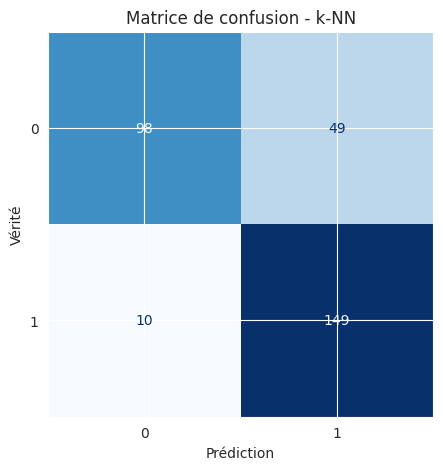


Cross-Validation Results (k=10):
Accuracy scores: [0.81045752 0.85620915 0.79738562 0.75163399 0.79084967 0.83006536
 0.81045752 0.84313725 0.84313725 0.75816993]
Mean accuracy: 0.8092 (±0.0337)

OPTIMISATION ET ÉVALUATION DE RANDOM FOREST

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       147
           1       0.98      0.68      0.80       159

    accuracy                           0.83       306
   macro avg       0.86      0.83      0.82       306
weighted avg       0.87      0.83      0.82       306

Test Accuracy: 0.8268
[[145   2]
 [ 51 108]]


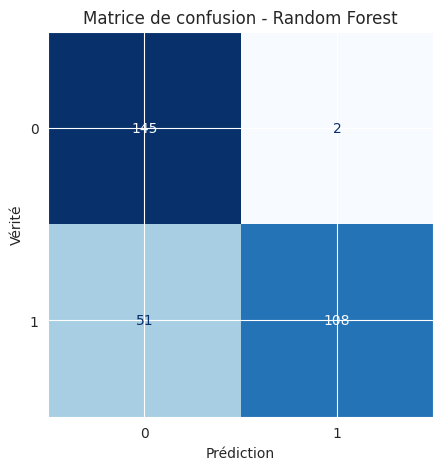


Cross-Validation Results (k=10):
Accuracy scores: [0.83006536 0.8627451  0.90849673 0.86928105 0.84313725 0.86928105
 0.83660131 0.88888889 0.86928105 0.89542484]
Mean accuracy: 0.8673 (±0.0243)

OPTIMISATION ET ÉVALUATION DE SVM

Recherche des meilleurs hyperparamètres pour SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       147
           1       0.96      0.92      0.94       159

    accuracy                           0.94       306
   macro avg       0.94      0.94      0.94       306
weighted avg       0.94      0.94      0.94       306

Test Accuracy: 0.9412
[[141   6]
 [ 12 147]]


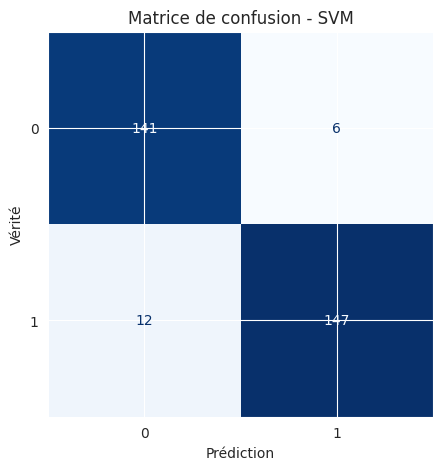


Cross-Validation Results (k=10):
Accuracy scores: [0.92156863 0.95424837 0.95424837 0.92810458 0.90196078 0.94771242
 0.93464052 0.94771242 0.95424837 0.96732026]
Mean accuracy: 0.9412 (±0.0185)


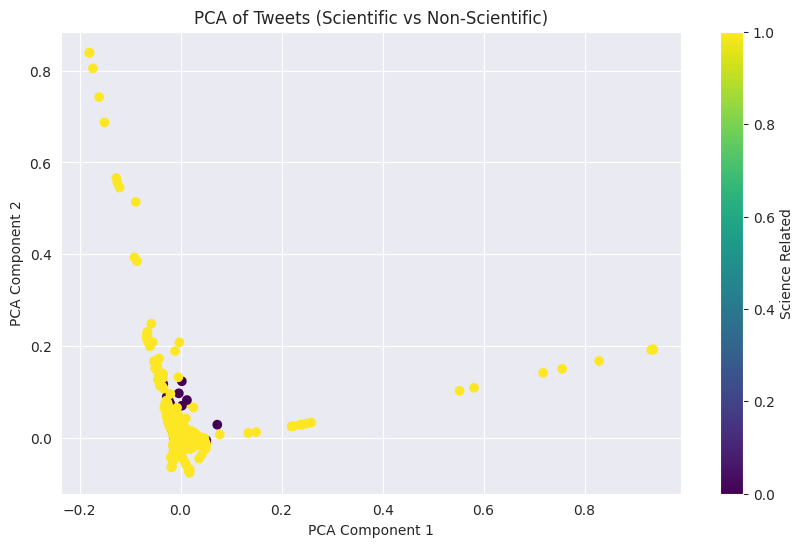

In [40]:
import json
#meme code que precedent juste ajoute de hyperparmetre
# Importations nécessaires***************************a garder hi ciaran et raphaelle et dalia  je suis la ************************************
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Téléchargement des ressources NLTK
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte (identique à votre version)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Vectorisation et SMOTE (identique)
X = df['cleaned_text']
y_binary = df['science_related']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Split train-test (identique)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Configuration KFold (identique)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionnaire des modèles AVEC leurs hyperparamètres à optimiser
models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Naive Bayes": {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
            'fit_prior': [True, False]
        }
    },
    "k-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

# Évaluation optimisée de chaque modèle
confused = {}
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION ET ÉVALUATION DE {name.upper()}")
    print(f"{'='*60}")
    
    # Optimisation par GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Validation croisée interne pour l'optimisation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
    
    # Évaluation sur le test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report sur le test set:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")
    
    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    confused[name] = {}
    confused[name]["Sci"] = [[int(cm[0][0]), int(cm[0][1])],
                            [int(cm[1][0]), int(cm[1][1])]]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.show()

    
    # Validation croisée k=10 avec le meilleur modèle (identique à votre configuration)
    cv_scores = cross_val_score(
        best_model,
        X_res,
        y_res,
        cv=kfold,
        scoring='accuracy'
    )
    
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Visualisation PCA (identique)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_res.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Tweets (Scientific vs Non-Scientific)')
plt.colorbar(label='Science Related')
plt.show()


with open('confusion_1.json', 'w') as f:
    f.write(json.dumps({"keys": list(confused.keys()), "values": list(confused.values())}))


## - Deuxième classification

In [18]:
%reset -f
%clear

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importations nécessaires
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB

import matplotlib as mpl

In [20]:
df = pd.read_csv('scitweets_export.tsv', sep='\t')


Optimisation de SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits


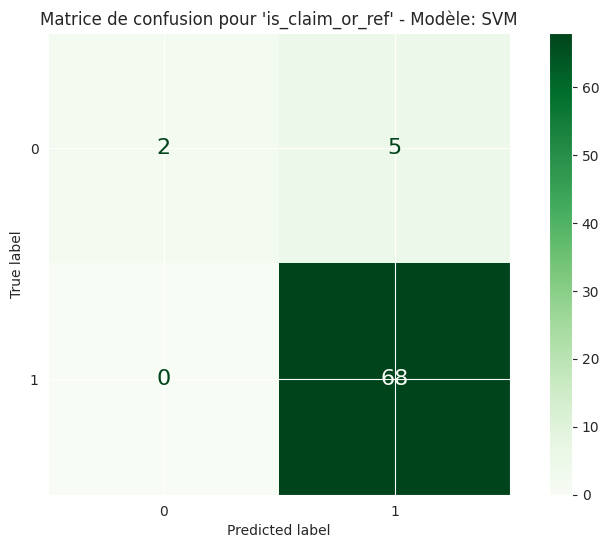

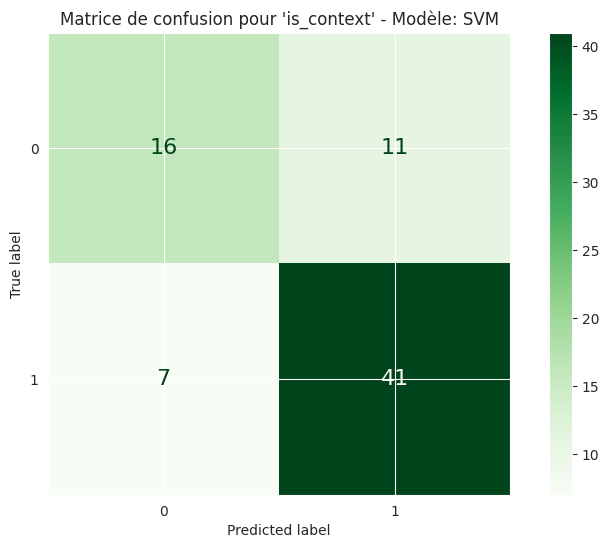


Top 50 features importantes pour le modèle: SVM

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: SVM

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.97      1.00      0.99       342
     context       0.95      0.97      0.96       251

   micro avg       0.96      0.99      0.97       593
   macro avg       0.96      0.99      0.97       593
weighted avg       0.96      0.99      0.97       593
 samples avg       0.97      0.99      0.9

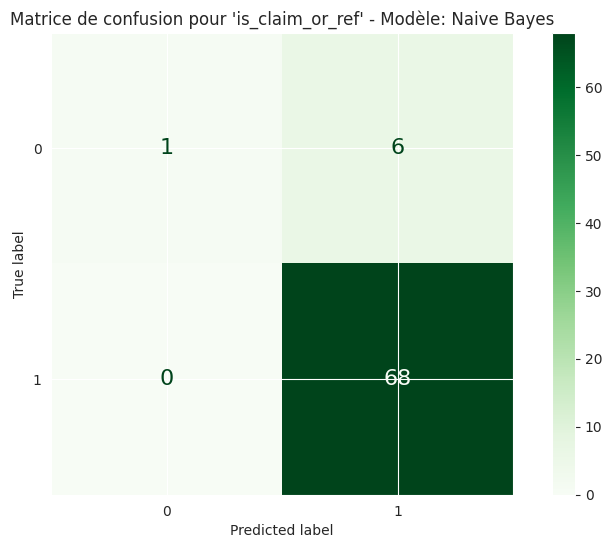

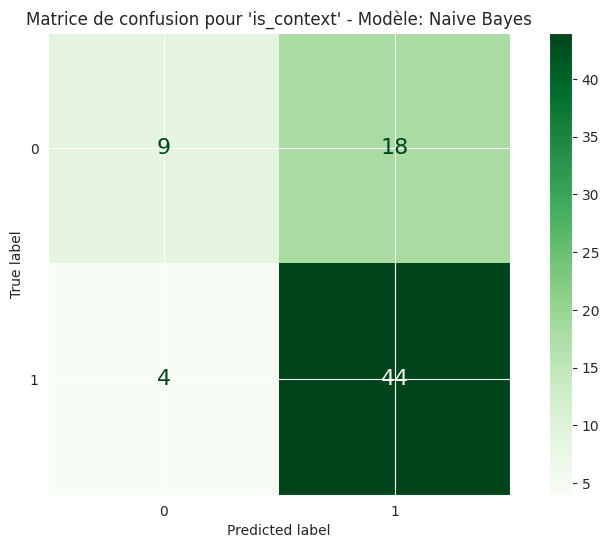


Top 50 features importantes pour le modèle: Naive Bayes

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: Naive Bayes

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.94      0.99      0.96       342
     context       0.83      0.94      0.88       251

   micro avg       0.89      0.97      0.93       593
   macro avg       0.88      0.96      0.92       593
weighted avg       0.89      0.97      0.93       593
 samples avg       0.90   

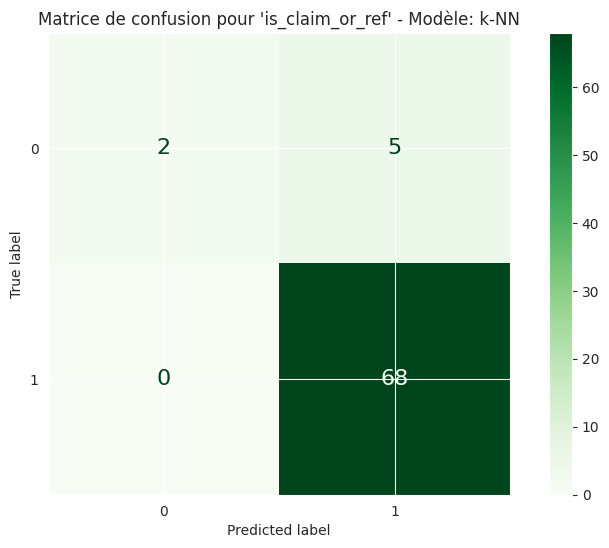

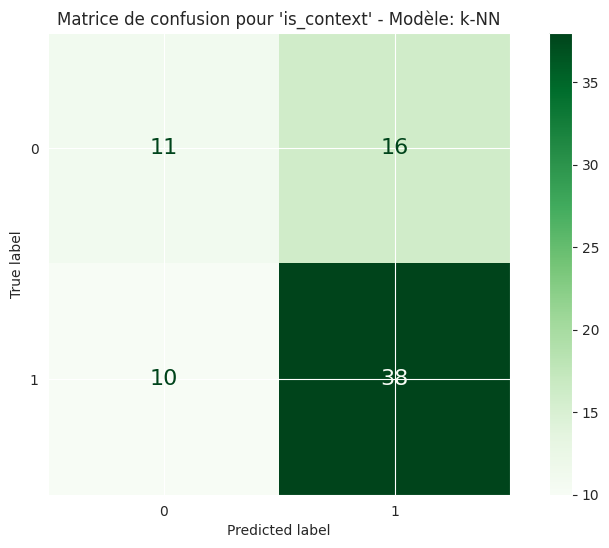


Top 50 features importantes pour le modèle: k-NN

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: k-NN

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.98      1.00      0.99       342
     context       0.91      0.96      0.93       251

   micro avg       0.95      0.98      0.96       593
   macro avg       0.94      0.98      0.96       593
weighted avg       0.95      0.98      0.96       593
 samples avg       0.96      0.98      0


KeyboardInterrupt



In [21]:
"""
Ce script implémente une classification multi-label pour catégoriser des tweets scientifiques selon deux dimensions :
1) Claim/Reference (affirmation ou référence scientifique)
2) Context (contexte scientifique)

FONCTIONNEMENT PRINCIPAL :

1. PRÉTRAITEMENT DES DONNÉES :
   - Nettoie le texte (minuscules, suppression stopwords, lemmatisation)
   - Filtre les tweets scientifiques (science_related == 1)
   - Crée deux labels binaires :
     * is_claim_or_ref: 1 si le tweet contient une affirmation ou référence scientifique
     * is_context: 1 si le tweet fournit un contexte scientifique

2. VECTORISATION :
   - Convertit le texte en features numériques via TF-IDF
   - Utilise des uni+bigrammes avec seuils min/max de fréquence
   - Limite à 10 000 features maximum pour éviter la malédiction de la dimension

3. ÉQUILIBRAGE DES DONNÉES :
   - Implémente un rééchantillonnage manuel spécifique au multi-label :
     * Identifie toutes les combinaisons de labels possibles
     * Suréchantillonne les combinaisons sous-représentées
   - Permet de gérer les déséquilibres entre classes

4. MODÉLISATION :
   - Teste plusieurs algorithmes classiques (SVM, RandomForest, Logistic Regression etc.)
   - Chaque modèle est encapsulé dans un MultiOutputClassifier pour gérer le multi-label
   - Utilise GridSearchCV pour optimiser les hyperparamètres

5. ÉVALUATION :
   - Validation croisée (10 folds) pour estimer la performance généralisable
   - Mesure l'accuracy globale et par label
   - Génère des rapports détaillés (precision, recall, f1-score)

CARACTÉRISTIQUES CLÉS :
- Gère les tweets pouvant appartenir à plusieurs catégories simultanément
- Préserve les relations entre labels pendant l'équilibrage
- Évite le surapprentissage par des paramètres conservateurs (max_df, min_df)
- Permet de comparer objectivement plusieurs algorithmes

UTILISATION TYPIQUE :
1. Charger un DataFrame pandas contenant les tweets et labels
2. Exécuter le script pour entraîner et évaluer les modèles
3. Analyser les rapports de classification pour sélectionner le meilleur modèle
"""



import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack
from sklearn.ensemble import GradientBoostingClassifier

# 1. Préparation des données
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# 2. Chargement et préparation
sci_df = df[df['science_related'] == 1].copy()
sci_df['is_claim_or_ref'] = ((sci_df['scientific_claim'] == 1) | (sci_df['scientific_reference'] == 1))
sci_df['is_context'] = (sci_df['scientific_context'] == 1)
sci_df['cleaned_text'] = sci_df['text'].apply(preprocess_tweet)

# 3. Vectorisation
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Réduit à bigrammes pour plus de stabilité
    max_features=10000,
    min_df=5,
    max_df=0.85
)
X = vectorizer.fit_transform(sci_df['cleaned_text'])
y = sci_df[['is_claim_or_ref', 'is_context']].values

feature_names = np.array(vectorizer.get_feature_names_out())


# 4. Rééchantillonnage manuel pour multi-label
def multilabel_oversample(X, y, random_state=None):
    np.random.seed(random_state)
    
    # Compter les occurrences de chaque combinaison de labels
    unique_labels, counts = np.unique(y, axis=0, return_counts=True)
    max_count = max(counts)
    
    resampled_X = []
    resampled_y = []
    
    for label_combination in unique_labels:
        indices = np.where((y == label_combination).all(axis=1))[0]
        n_samples = len(indices)
        
        # Suréchantillonnage seulement pour les classes minoritaires
        if n_samples < max_count:
            n_to_add = max_count - n_samples
            selected = np.random.choice(indices, size=n_to_add, replace=True)
            
            resampled_X.append(X[selected])
            resampled_y.append(y[selected])
    
    if resampled_X:
        return vstack([X] + resampled_X), np.vstack([y] + resampled_y)
    return X, y

X_res, y_res = multilabel_oversample(X, y, random_state=42)

# 5. Configuration des modèles avec class_weight
models = {
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__kernel': ['linear', 'rbf']
        }
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {
            'estimator__alpha': [0.1, 0.5, 1.0],
            'estimator__fit_prior': [True, False]
        }
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {
            'estimator__n_neighbors': [3, 5, 7],
            'estimator__weights': ['uniform', 'distance'],
            'estimator__metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [None, 10, 20],
            'estimator__min_samples_split': [2, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__penalty': ['l1', 'l2'],
            'estimator__solver': ['liblinear']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5]
        }
    }
}

# 6. Évaluation avec KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(lambda y_true, y_pred: np.mean(y_true == y_pred))

for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"Optimisation de {name}")
    print(f"{'='*60}")
    
    model = MultiOutputClassifier(config['model'])
    
    grid = GridSearchCV(
        model,
        param_grid=config['params'],
        cv=kf,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_res, y_res)
    
    
    ##########################################################################
    
    #Heatmap
    
    mpl.rcParams['figure.figsize'] = [10.0, 6.0]

    
    # Split les données pour évaluer et afficher la matrice de confusion
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit le meilleur modèle sur les données d'entraînement
    grid.best_estimator_.fit(X_train_sub, y_train_sub)

    # Prédiction
    y_pred = grid.best_estimator_.predict(X_test_sub)

    # Afficher la matrice de confusion pour chaque label séparément
    label_names = ['is_claim_or_ref', 'is_context']

    for i in range(y.shape[1]):
        cm = confusion_matrix(y_test_sub[:, i], y_pred[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Greens')
        plt.title(f"Matrice de confusion pour '{label_names[i]}' - Modèle: {name}")
        
        
    
        for text in disp.text_.ravel():
            text.set_fontsize(16)
        
        
        plt.show()
    
    
    ##########################################################################
    ##########################################################################
    
    print(f"\nTop 50 features importantes pour le modèle: {name}")
    best_model = grid.best_estimator_

    for i, label in enumerate(['claim_or_ref', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")
        estimator = best_model.estimators_[i]
    
        if hasattr(estimator, 'coef_'):
            # Pour LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))

        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest ou GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))
            
        else:
            print(f"(i) Ce modèle ne supporte pas l'extraction directe des features importantes.")
    
    ##########################################################################
    ##########################################################################
    ##########################################################################
    
    print(f"\nTop 50 features importantes pour le modèle: {name}")
    best_model = grid.best_estimator_

    for i, label in enumerate(['claim_or_ref', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")
        estimator = best_model.estimators_[i]
    
        if hasattr(estimator, 'coef_'):
            # Pour LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))

        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest ou GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))
            
        else:
            print(f"(i) Ce modèle ne supporte pas l'extraction directe des features importantes.")
    
    ##########################################################################
    
    # Évaluation
    y_pred = grid.predict(X)
    print("\nRapport de classification:")
    print(classification_report(y, y_pred, target_names=['claim_or_ref', 'context']))
    
    # Validation croisée
    cv_scores = cross_val_score(grid.best_estimator_, X_res, y_res, cv=kf, scoring=scorer)
    print(f"\nCV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Meilleurs paramètres: {grid.best_params_}")



## - Troisième classification

In [79]:
%reset -f
%clear

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

In [81]:
df = pd.read_csv('scitweets_export.tsv', sep='\t')


Optimisation de LinearSVC
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Meilleurs paramètres: {'estimator__C': 1, 'estimator__penalty': 'l2'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.83      0.83      0.83        54
   reference       0.67      0.77      0.71        39
     context       0.82      0.83      0.82        48

   micro avg       0.78      0.82      0.80       141
   macro avg       0.77      0.81      0.79       141
weighted avg       0.78      0.82      0.80       141
 samples avg       0.82      0.86      0.80       141



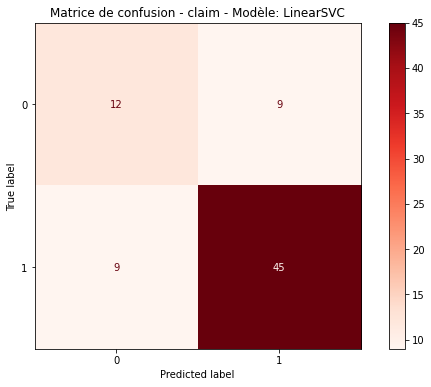

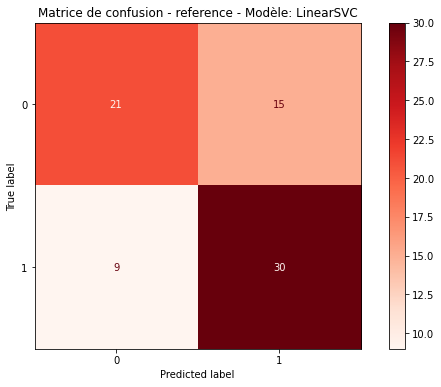

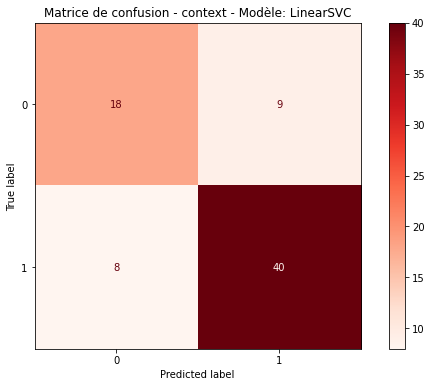


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('vitro',), ('research',), ('increase',), ('url',), ('non',), ('case',), ('conference',), ('medical',), ('2018',), ('funding',), ('scientist',), ('science',), ('drug',), ('post',), ('eurekamag',), ('science url',), ('april',), ('discover',), ('moon',), ('despite',), ('article',), ('url url url',), ('public',), ('earth',), ('rise',), ('based',), ('support',), ('know',), ('reduces',), ('disease',), ('year',), ('blood',), ('could',), ('2014',), ('planet',), ('oral',), ('one',), ('work',), ('better',), ('speaking',), ('finding',), ('stress',), ('bone',), ('age',), ('workshop',), ('key',), ('animal',), ('transmission',), ('site',), ('effect',)]

--- Top features pour la classe 'reference' ---
[('url',), ('april',), ('journal',), ('increase',), ('eurekamag',), ('support',), ('symptom',), ('latest',), ('research url',), ('rise',), ('may',), ('scientist',), ('many',), ('like',), ('transmission',),

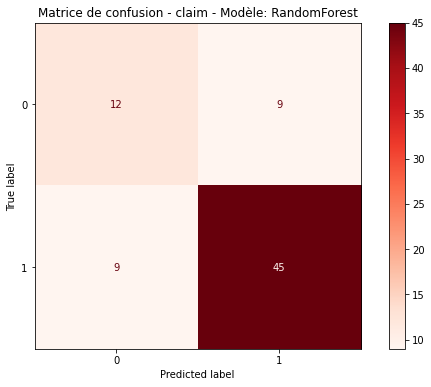

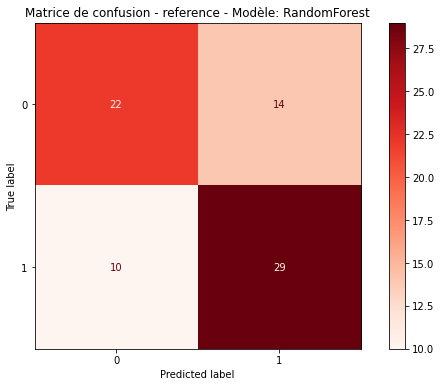

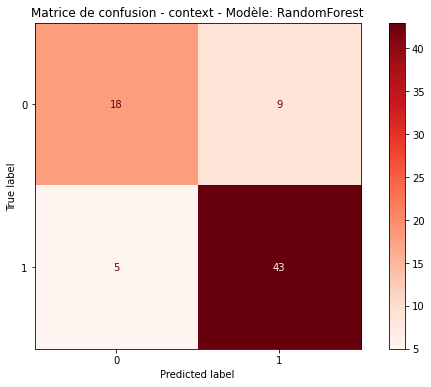


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('url',), ('science',), ('research',), ('study',), ('conference',), ('increase',), ('scientist',), ('url url',), ('eurekamag',), ('science url',), ('support',), ('new',), ('cancer',), ('april',), ('people',), ('could',), ('non',), ('change',), ('article',), ('vitro',), ('future',), ('one',), ('transmission',), ('evidence',), ('help',), ('find',), ('medical',), ('planet',), ('research url',), ('blog',), ('based',), ('case',), ('five',), ('funding',), ('woman',), ('2018',), ('brain',), ('according',), ('know',), ('first',), ('health',), ('structure',), ('rise',), ('treatment',), ('culture',), ('another',), ('relationship',), ('risk',), ('lead',), ('earth',)]

--- Top features pour la classe 'reference' ---
[('url',), ('science',), ('support',), ('url url',), ('study',), ('increase',), ('rise',), ('scientist',), ('help',), ('april',), ('eurekamag',), ('life',), ('research',), ('moon',), ('fiv

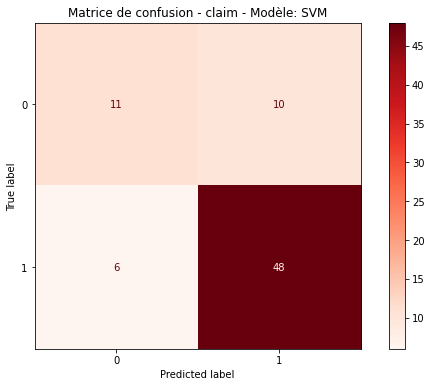

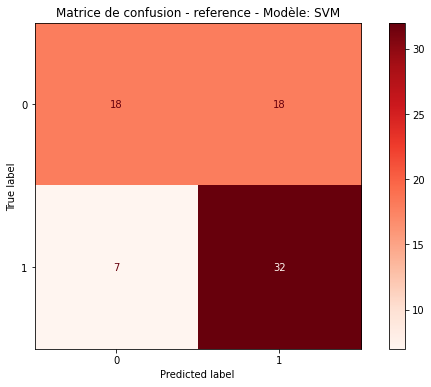

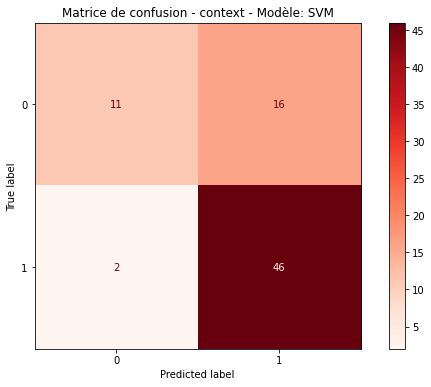


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour SVC

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour SVC

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour SVC

CV F1-Score (micro): 0.8992 ± 0.0691

 accuracy : 0.7331 ± 0.0691
Hamming Loss: 0.26222222222222225

Optimisation de Naive Bayes
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Meilleurs paramètres: {'estimator__alpha': 1.0, 'estimator__fit_prior': True}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.86      0.81      0.84        54
   reference       0.60      0.62      0.61        39
     context       0.68      1.00      0.81        48

   micro avg       0.72      0.82      0.77       141
   macro avg       0.71      0.81      0.75       141
weighted avg       0.73      0.82      0.76

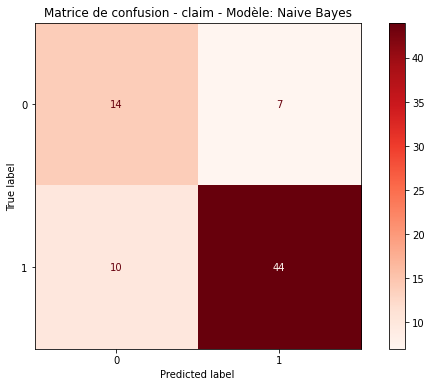

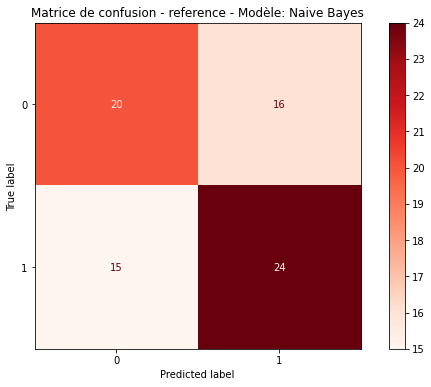

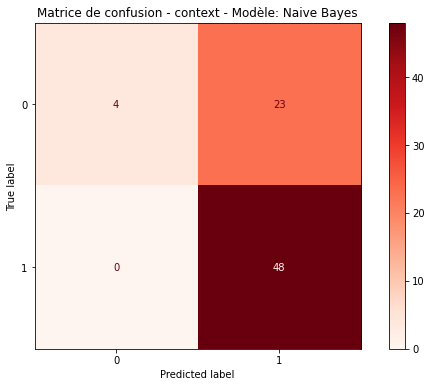


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour MultinomialNB

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour MultinomialNB

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour MultinomialNB

CV F1-Score (micro): 0.8601 ± 0.0802

 accuracy : 0.6101 ± 0.0802
Hamming Loss: 0.31555555555555553

Optimisation de k-NN
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Meilleurs paramètres: {'estimator__metric': 'cosine', 'estimator__n_neighbors': 7, 'estimator__weights': 'distance'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.86      0.69      0.76        54
   reference       0.57      0.64      0.60        39
     context       0.67      0.96      0.79        48

   micro avg       0.69      0.77      0.73       141
   macro avg       0.70      0.76

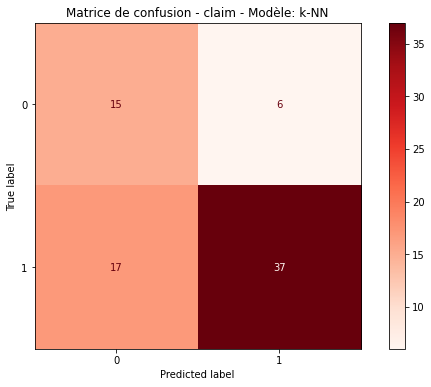

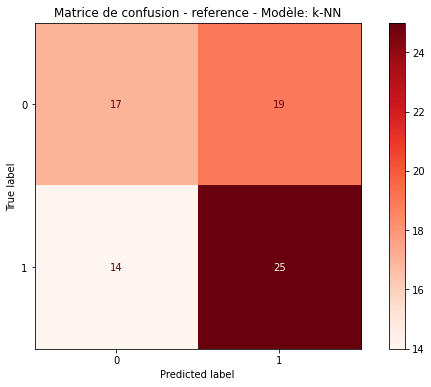

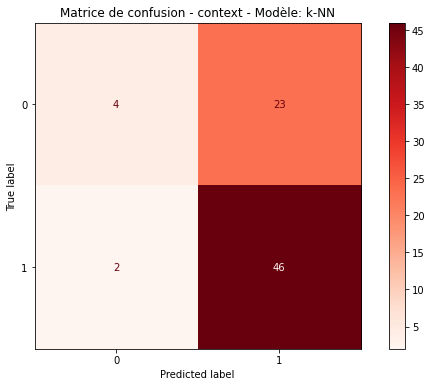


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

CV F1-Score (micro): 0.8615 ± 0.0763

 accuracy : 0.6868 ± 0.0763
Hamming Loss: 0.36

Optimisation de Logistic Regression
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Meilleurs paramètres: {'estimator__C': 10, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.82      0.83      0.83        54
   reference       0.70      0.72      0.71        39
     context       0.85      0.81      0.83        48

   micro avg       0.79      0.79      0.79       141
   macro avg       0.79   

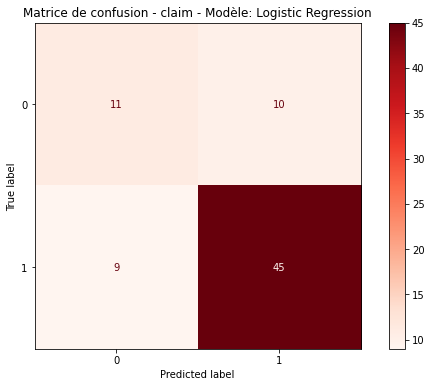

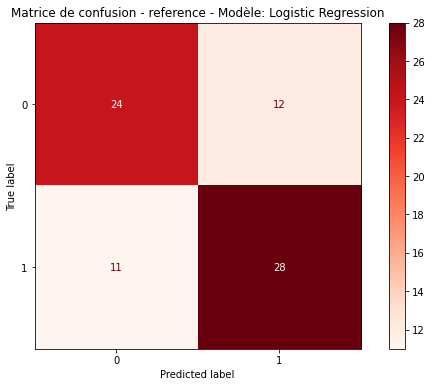

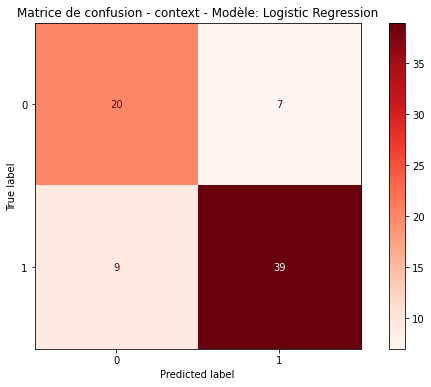


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('conference',), ('case',), ('vitro',), ('research',), ('increase',), ('non',), ('post',), ('2018',), ('grant',), ('url',), ('science',), ('medical',), ('2014',), ('work',), ('url url url',), ('oral',), ('drug',), ('service',), ('side',), ('eurekamag',), ('read',), ('transmission',), ('twice',), ('article',), ('funding',), ('say',), ('public',), ('finding',), ('year',), ('program',), ('support',), ('disease',), ('scientist',), ('based',), ('rise',), ('stop',), ('despite',), ('coronavirus',), ('discover',), ('moon',), ('bone',), ('want',), ('planet',), ('treatment',), ('key',), ('new',), ('science url',), ('speaking',), ('health url',), ('effect',)]

--- Top features pour la classe 'reference' ---
[('url',), ('deal',), ('symptom',), ('increase',), ('latest',), ('action',), ('april',), ('like',), ('journal',), ('great',), ('use',), ('ocean',), ('eurekamag',), ('scientist',), ('cell',), ('may

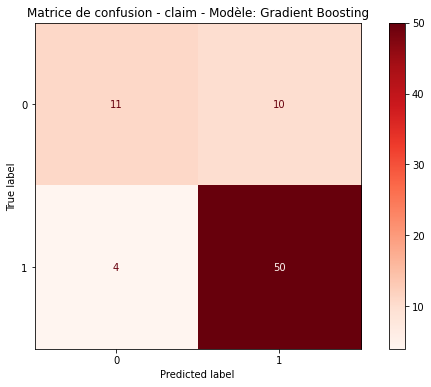

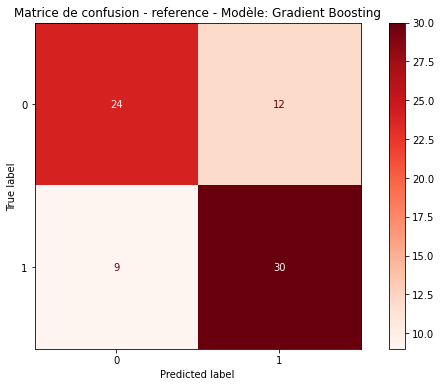

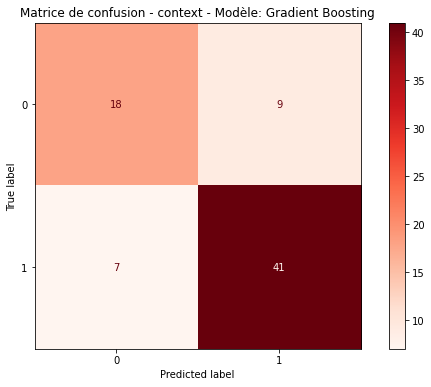


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('url',), ('science',), ('research',), ('conference',), ('support',), ('scientist',), ('eurekamag',), ('vitro',), ('increase',), ('could',), ('based',), ('non',), ('study',), ('april',), ('article',), ('funding',), ('2018',), ('culture',), ('read',), ('risk',), ('post',), ('rise',), ('new',), ('analysis',), ('blog',), ('2014',), ('future',), ('cause',), ('moon',), ('discover',), ('look',), ('twice',), ('love',), ('cancer',), ('first',), ('take',), ('side',), ('work',), ('relationship',), ('another',), ('people',), ('say',), ('find',), ('disease',), ('depression',), ('see',), ('oral',), ('latest',), ('url url url',), ('change',)]

--- Top features pour la classe 'reference' ---
[('url',), ('science',), ('scientist',), ('rise',), ('eurekamag',), ('increase',), ('could',), ('five',), ('conference',), ('building',), ('program',), ('april',), ('much',), ('study',), ('research url',), ('article'

In [82]:
# ------------------------------------------------------------
# SOLUTION FINALE POUR CLASSIFICATION MULTI-LABEL
# Avec gestion du déséquilibre et validation croisée adaptée
# ------------------------------------------------------------
"""le Hamming loss est une métrique utilisée en classification multi-label (comme dans ton cas), 
et elle mesure la proportion de mauvaises prédictions de labels par rapport au nombre total de labels.

"""

import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# 1. Préparation des données

stop_words = set(stopwords.words('english'))
custom_stop_words = {"rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words = stop_words #- negations
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    #tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = re.sub(r"(https?://\S+)", " URL ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# 2. Chargement et préparation
sci_df = df[df['science_related'] == 1].copy()
sci_df['cleaned_text'] = sci_df['text'].apply(preprocess_tweet)

# 3. Création des cibles multi-labels
y = sci_df[['scientific_claim', 'scientific_reference', 'scientific_context']].values
X = sci_df['cleaned_text']



# 4. Vectorisation
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=8000,
    min_df=3,
    max_df=0.85
)
X_vec = vectorizer.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

# 5. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, 
    test_size=0.2,
    random_state=42
)

# 6. Rééchantillonnage manuel adapté au multi-label
def multilabel_oversample(X, y, random_state=None):
    np.random.seed(random_state)
    
    # Compter les occurrences de chaque combinaison de labels
    unique_labels, counts = np.unique(y, axis=0, return_counts=True)
    max_count = max(counts)
    
    resampled_X = []
    resampled_y = []
    
    for label_combination, count in zip(unique_labels, counts):
        indices = np.where((y == label_combination).all(axis=1))[0]
        
        # Suréchantillonnage seulement pour les classes minoritaires
        if count < max_count:
            n_to_add = max_count - count
            selected = np.random.choice(indices, size=n_to_add, replace=True)
            
            resampled_X.append(X[selected])
            resampled_y.append(y[selected])
    
    if resampled_X:
        return vstack([X] + resampled_X), np.vstack([y] + resampled_y)
    return X, y

X_train_res, y_train_res = multilabel_oversample(X_train, y_train, random_state=42)

# 7. Configuration des modèles
models = {
    "LinearSVC": {
        "model": LinearSVC(dual=False, class_weight='balanced'),
        "params": {
            'estimator__C': [0.1, 1],
            'estimator__penalty': ['l1', 'l2']
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(class_weight='balanced_subsample'),
        "params": {
            'estimator__n_estimators': [100],
            'estimator__max_depth': [10, None],
            'estimator__min_samples_split': [5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__kernel': ['linear', 'rbf']
        }
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {
            'estimator__alpha': [0.1, 0.5, 1.0],
            'estimator__fit_prior': [True, False]
        }
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {
            'estimator__n_neighbors': [3, 5, 7],
            'estimator__weights': ['uniform', 'distance'],
            'estimator__metric': ['euclidean', 'cosine']
        }
    },
    
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__penalty': ['l1', 'l2'],
            'estimator__solver': ['liblinear']
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5]
        }
    }
    
}

# 8. Évaluation avec KFold standard (adapté au multi-label)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"Optimisation de {name}")
    print(f"{'='*60}")
    
    model = MultiOutputClassifier(config['model'])
    
    grid = GridSearchCV(
        model,
        param_grid=config['params'],
        cv=kf,
        scoring='f1_micro',
        n_jobs=-1,
        verbose=1
    )
    
    # Entraînement sur données rééchantillonnées
    grid.fit(X_train_res, y_train_res)
    
    # Évaluation sur test set original
    y_pred = grid.predict(X_test)
    
    print(f"\nMeilleurs paramètres: {grid.best_params_}")
    print("\nPerformance sur le TEST SET:")
    print(classification_report(
        y_test, y_pred,
        target_names=['claim', 'reference', 'context'],
        zero_division=0
    ))
    
    ###################################################################
    
    # Afficher une matrice de confusion
    
    # Noms des étiquettes pour chaque colonne
    label_names = ['claim', 'reference', 'context']

    # Boucle sur chaque label (chaque colonne)
    for i, label in enumerate(label_names):
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Reds')
        plt.title(f"Matrice de confusion - {label} - Modèle: {name}")
        plt.show()
    
    
    
    ###################################################################
    ###################################################################
    
    #Extraire les features les plus important
    
    nombre_de_features = 50
    
    print(f"\nTop", nombre_de_features, "features importantes pour le modèle: {name}")

    # Récupérer le meilleur modèle entraîné
    best_model = grid.best_estimator_

    # Pour chaque sortie (label multi-label), extraire les features importantes
    for i, label in enumerate(['claim', 'reference', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")

        estimator = best_model.estimators_[i]  # modèle pour ce label

        if hasattr(estimator, 'coef_'):
            # Pour LinearSVC ou LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[(-1*nombre_de_features):][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))


        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest, GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[(-1*nombre_de_features):][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))

        else:
            print(f"Pas d'attribut de feature importance pour {type(estimator).__name__}")

    
    
    
    ####################################################################
    
    # Scores de validation croisée
    cv_scores = []
    cv_score = []
    for train_idx, test_idx in kf.split(X_train_res):
        X_train_fold, X_val_fold = X_train_res[train_idx], X_train_res[test_idx]
        y_train_fold, y_val_fold = y_train_res[train_idx], y_train_res[test_idx]
        
        model.set_params(**grid.best_params_)
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        
        # Calcul de l'accuracy au lieu du F1-score
        cv_scores.append(accuracy_score(y_val_fold, y_pred_fold))
        cv_score.append(f1_score(y_val_fold, y_pred_fold, average='micro'))
    
    print(f"\nCV F1-Score (micro): {np.mean(cv_score):.4f} ± {np.std(cv_scores):.4f}")
    print(f"\n accuracy : {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    from sklearn.metrics import hamming_loss
    print("Hamming Loss:", hamming_loss(y_test, y_pred))


# Discussion

# Conclusion